In [7]:
import sounddevice as sd
import numpy as np
import tensorflow as tf
import librosa
import soundfile as sf

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='Spectrogram_maodel_1.tflite')
interpreter.allocate_tensors()

# Define the function to preprocess audio
def preprocess_audio(audio, sample_rate=16000):
    audio = np.squeeze(audio)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mel_spectrogram = np.log1p(mel_spectrogram)
    mel_spectrogram = mel_spectrogram[np.newaxis, ..., np.newaxis]
    return mel_spectrogram.astype(np.float32)

# Define the callback function for recording audio
def callback(indata, frames, time, status):
    if status:
        print(status)
    audio = np.array(indata)
    audio = preprocess_audio(audio)
    # Perform inference
    interpreter.set_tensor(interpreter.get_input_details()[0]['index'], audio)
    interpreter.invoke()
    output = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
    predicted_label_index = np.argmax(output)
    predicted_label = label_names_slice[predicted_label_index]
    print(f"Predicted command: {predicted_label}")

# Start recording audio
duration = 5  # Record for 5 seconds
sample_rate = 16000
channels = 1
recorded_audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=channels, dtype='int16')

print('Recording...')
sd.wait()
print('Recording stopped.')

# Save the recorded audio to a file
file_path = 'recorded_audio.wav'
sf.write(file_path, recorded_audio, sample_rate)

# Load the recorded audio file and pass it through the model for prediction
audio, _ = librosa.load(file_path, sr=sample_rate)
audio = preprocess_audio(audio)
interpreter.set_tensor(interpreter.get_input_details()[0]['index'], audio)
interpreter.invoke()
output = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
predicted_label_index = np.argmax(output)
predicted_label = label_names_slice[predicted_label_index]
print(f"Predicted command from recorded audio: {predicted_label}")


Recording...
Recording stopped.


ValueError: Cannot set tensor: Dimension mismatch. Got 128 but expected 124 for dimension 1 of input 0.

In [6]:
import sounddevice as sd
import numpy as np
import tensorflow as tf
import librosa
import soundfile as sf

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='Spectrogram_maodel_1.tflite')
interpreter.allocate_tensors()

# Define the function to preprocess audio
def preprocess_audio(audio, sample_rate=16000):
    audio = np.squeeze(audio)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mel_spectrogram = np.log1p(mel_spectrogram)
    mel_spectrogram = mel_spectrogram[np.newaxis, ..., np.newaxis]
    return mel_spectrogram.astype(np.float32)

# Define the callback function for recording audio
def callback(indata, frames, time, status):
    if status:
        print(status)
    audio = np.array(indata)
    audio = preprocess_audio(audio)
    # Perform inference
    interpreter.set_tensor(interpreter.get_input_details()[0]['index'], audio)
    interpreter.invoke()
    output = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
    predicted_label_index = np.argmax(output)
    predicted_label = label_names_slice[predicted_label_index]
    print(f"Predicted command: {predicted_label}")

# Start recording audio
duration = 5  # Record for 5 seconds
sample_rate = 16000
channels = 1
recorded_audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=channels, dtype='int16')

print('Recording...')
sd.wait()
print('Recording stopped.')

# Save the recorded audio to a file
file_path = 'recorded_audio.wav'
sf.write(file_path, recorded_audio, sample_rate)

# Load the recorded audio file and pass it through the model for prediction
audio, _ = librosa.load(file_path, sr=sample_rate)
audio = preprocess_audio(audio)
interpreter.set_tensor(interpreter.get_input_details()[0]['index'], audio)
interpreter.invoke()
output = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
predicted_label_index = np.argmax(output)
predicted_label = label_names_slice[predicted_label_index]
print(f"Predicted command from recorded audio: {predicted_label}")


Recording...
Recording stopped.


ValueError: Cannot set tensor: Dimension mismatch. Got 128 but expected 124 for dimension 1 of input 0.

In [8]:
import sounddevice as sd
import numpy as np
import tensorflow as tf
import librosa
import soundfile as sf

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='Spectrogram_maodel_1.tflite')
interpreter.allocate_tensors()

# Define the function to preprocess audio
def preprocess_audio(audio, sample_rate=16000):
    audio = np.squeeze(audio)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mel_spectrogram = np.log1p(mel_spectrogram)
    mel_spectrogram = mel_spectrogram[np.newaxis, ..., np.newaxis]
    return mel_spectrogram.astype(np.float32)

# Define the callback function for recording audio
def callback(indata, frames, time, status):
    if status:
        print(status)
    audio = np.array(indata)
    audio = preprocess_audio(audio)
    # Perform inference
    interpreter.set_tensor(interpreter.get_input_details()[0]['index'], audio)
    interpreter.invoke()
    output = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
    predicted_label_index = np.argmax(output)
    predicted_label = label_names_slice[predicted_label_index]
    print(f"Predicted command: {predicted_label}")

# Start recording audio
duration = 5  # Record for 5 seconds
sample_rate = 16000
channels = 1
recorded_audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=channels, dtype='int16')

print('Recording...')
sd.wait()
print('Recording stopped.')

# Save the recorded audio to a file
file_path = 'recorded_audio.wav'
sf.write(file_path, recorded_audio, sample_rate)

# Load the recorded audio file and pass it through the model for prediction
audio, _ = librosa.load(file_path, sr=sample_rate)
audio = preprocess_audio(audio)
interpreter.set_tensor(interpreter.get_input_details()[0]['index'], audio)
interpreter.invoke()
output = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
predicted_label_index = np.argmax(output)
predicted_label = label_names_slice[predicted_label_index]
print(f"Predicted command from recorded audio: {predicted_label}")


Recording...
Recording stopped.


ValueError: Cannot set tensor: Dimension mismatch. Got 128 but expected 124 for dimension 1 of input 0.

In [ ]:
# Settings for recording
duration = 2  # Record for 2 seconds
sample_rate = 16000  # Sample rate
channels = 1  # Mono recording

# Record audio from microphone
print("Recording...")
audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=channels, dtype='int16')
sd.wait()  # Wait for the recording to finish
print("Recording stopped.")

# Generate a unique filename using current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
file_path = f"recording/recorded_audio_{timestamp}.wav"

# Save the recorded audio to a file
sf.write(file_path, audio_data, sample_rate)
print(f"Audio saved as {file_path}")

In [ ]:
def get_label_names():
    return label_names

# Get the latest audio file saved in the 'recording' directory
latest_audio_file = max([os.path.join('recording', f) for f in os.listdir('recording') if f.endswith('.wav')], key=os.path.getctime)

x = latest_audio_file
x = tf.io.read_file(str(x))
x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)
x = tf.squeeze(x, axis=-1)
waveform = x
x = get_mel_spectrogram(x)
x = x[tf.newaxis,...]

prediction = model.predict(x)

# Get the labels using tf.py_function
label_names_slice = tf.py_function(func=get_label_names, inp=[], Tout=[tf.string])[0]

predicted_label_index = tf.argmax(prediction[0])
predicted_label = tf.gather(label_names_slice, predicted_label_index)

plt.bar(label_names_slice.numpy(), tf.nn.softmax(prediction[0]))
plt.title(predicted_label.numpy())
plt.show()

Audio(waveform, rate=16000)


In [ ]:
import sounddevice as sd
import numpy as np
import tensorflow as tf
import librosa
import soundfile as sf

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='Spectrogram_maodel_1.tflite')
interpreter.allocate_tensors()

# Define the function to preprocess audio
def preprocess_audio(audio, sample_rate=16000):
    audio = np.squeeze(audio)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mel_spectrogram = np.log1p(mel_spectrogram)
    mel_spectrogram = mel_spectrogram[np.newaxis, ..., np.newaxis]
    return mel_spectrogram.astype(np.float32)

# Define the callback function for recording audio
def callback(indata, frames, time, status):
    if status:
        print(status)
    audio = np.array(indata)
    audio = preprocess_audio(audio)
    # Perform inference
    interpreter.set_tensor(interpreter.get_input_details()[0]['index'], audio)
    interpreter.invoke()
    output = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
    predicted_label_index = np.argmax(output)
    predicted_label = label_names_slice[predicted_label_index]
    print(f"Predicted command: {predicted_label}")

# Start recording audio
duration = 5  # Record for 5 seconds
sample_rate = 16000
channels = 1
recorded_audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=channels, dtype='int16')

print('Recording...')
sd.wait()
print('Recording stopped.')

# Save the recorded audio to a file
file_path = 'recorded_audio.wav'
sf.write(file_path, recorded_audio, sample_rate)

# Load the recorded audio file and pass it through the model for prediction
audio, _ = librosa.load(file_path, sr=sample_rate)
audio = preprocess_audio(audio)
interpreter.set_tensor(interpreter.get_input_details()[0]['index'], audio)
interpreter.invoke()
output = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])
predicted_label_index = np.argmax(output)
predicted_label = label_names_slice[predicted_label_index]
print(f"Predicted command from recorded audio: {predicted_label}")


In [72]:
import os
from datetime import datetime
import sounddevice as sd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio

# Load the model
model = tf.keras.models.load_model('Spectrogram_model_1.keras')

# Settings for recording
duration = 2  # Record for 2 seconds
sample_rate = 16000  # Sample rate
channels = 1  # Mono recording

# Record audio from microphone
print("Recording...")
audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=channels, dtype='int16')
sd.wait()  # Wait for the recording to finish
print("Recording stopped.")

# Generate a unique filename using current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
file_path = f"recording/recorded_audio_{timestamp}.wav"

# Save the recorded audio to a file
sf.write(file_path, audio_data, sample_rate)
print(f"Audio saved as {file_path}")



Recording...
Recording stopped.
Audio saved as recording/recorded_audio_20240314_095457.wav


(1, 124, 128, 1, 1)
1/1 [==============================] - 0s 27ms/step


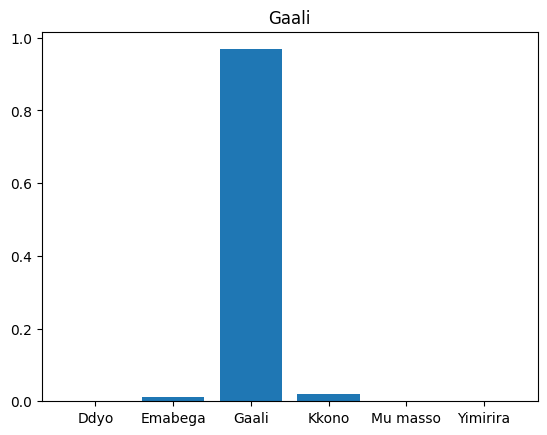

In [74]:
def get_label_names():
    return ['Ddyo', 'Emabega', 'Gaali', 'Kkono',   'Mu masso', 'Yimirira']

def get_mel_spectrogram(waveform, sample_rate=16000, n_mels=128):
    # Compute the Short-Time Fourier Transform (STFT)
    stft = tf.signal.stft(waveform, frame_length=255, frame_step=128)

    # Convert the magnitude of the STFT to a Mel spectrogram
    spectrogram = tf.abs(stft)
    mel_spectrogram = tf.signal.linear_to_mel_weight_matrix(
        num_mel_bins=n_mels,
        num_spectrogram_bins=spectrogram.shape[-1],
        sample_rate=sample_rate
    )
    mel_spectrogram = tf.tensordot(spectrogram, mel_spectrogram, 1)
    mel_spectrogram = tf.math.log(mel_spectrogram + 1e-6)  # Log-scale

    # Add an axis for the batch size
    mel_spectrogram = mel_spectrogram[..., tf.newaxis]

    return mel_spectrogram



# Load the audio file and preprocess for inference
x = file_path
x = tf.io.read_file(str(x))
x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)
x = tf.squeeze(x, axis=-1)
waveform = x
x = get_mel_spectrogram(x)
# x = x.T  # Transpose to match the expected shape (124, 128)
x = x[np.newaxis, ..., np.newaxis]  # Add batch and channel dimensions
print(x.shape)

# Perform inference
prediction = model.predict(x)

# Get the labels
label_names_slice = get_label_names()

# Get the predicted label
predicted_label_index = np.argmax(prediction[0])
predicted_label = label_names_slice[predicted_label_index]

# Display the prediction
plt.bar(label_names_slice, tf.nn.softmax(prediction[0]))
plt.title(predicted_label)
plt.show()

# Play the recorded audio
Audio(waveform, rate=16000)
